##Importing Libraries

In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

##Creating Dataframe from excel file

In [14]:
df = pd.read_excel("data.xlsx")
df

,Height,Shoes Size,Pet,Gender
0,157.48,9.0,1,female
1,172.72,8.5,0,male
2,160.02,6.5,5,female
3,170.18,8.0,0,male
4,172.72,10.0,0,male
...,...,...,...,...
95,190.50,12.0,0,male
96,180.26,10.5,2,male
97,157.48,6.5,0,female
98,165.00,9.0,1,female


##Divide Dataframe into classes and attributes 
##Then into training and test data

In [15]:
##attribute dataframe (got rid of class data)
attr = df.drop(columns= 'Gender')

##class dataframe
df_class = df.Gender

##splitting data into test set and training set
attr_train, attr_test, class_train, class_test = train_test_split(attr,df_class)
attr_train.shape, attr_test.shape, class_train.shape, class_test.shape

((75, 3), (25, 3), (75,), (25,))

##Encoding

In [16]:
##Setting common used methods as variables
##Here scaler type is selected
le = preprocessing.LabelEncoder().fit(class_train)
nl = preprocessing.MinMaxScaler().fit(attr_train.to_numpy())

##LabelEncoding the class dataframe
##called it actual because this data holds the real class that the machine is trying to predict.
#subsection of class and actual data
act_train = le.transform(class_train)
act_test = le.transform(class_test)

#Encoding the attributes
x_train = nl.transform(attr_train.to_numpy())
x_test = nl.transform(attr_test.to_numpy())

##Building Machine Learning model

In [17]:
##Running a while loop to check how the machine responds to observing different amounts of neighbours
i = 1
while(i<76):
    knn = KNeighborsClassifier(n_neighbors= i).fit(x_train,act_train)
    test_score = knn.score(x_test,act_test)
    train_score = knn.score(x_train,act_train)
    i += 1

##After observing data selecting the number neighbours.
##The encoding section was set to MinMaxScaler after tests, to ensure best model
knn = KNeighborsClassifier(n_neighbors= 11).fit(x_train,act_train)

##Creating plots

C:\Users\ahmad\AppData\Local\Temp\ipykernel_16208\914253359.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs1 = plt.subplot2grid( shape= (1,3), loc = (0,0))


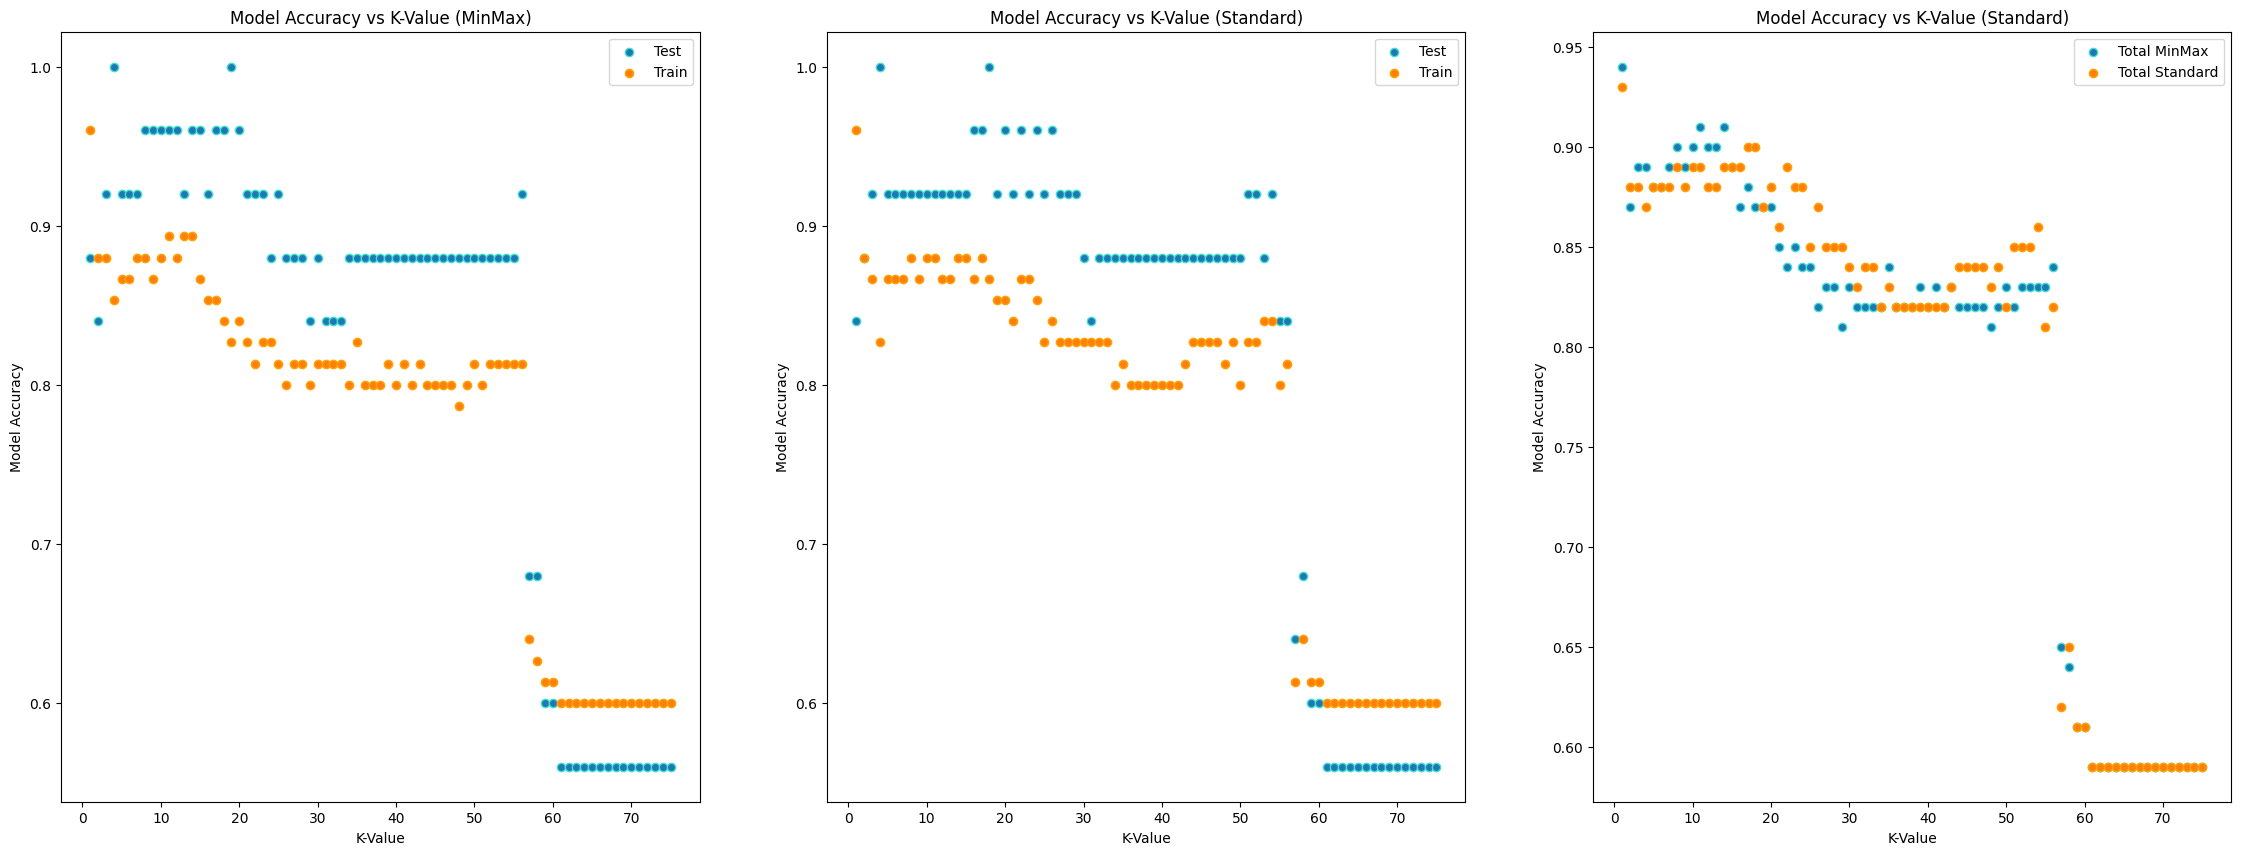

In [18]:
##Using manually inputted data and creating plots
df_1 = pd.read_excel('manual_input_data.xlsx')

#Creating muliple plots
fig, axs = plt.subplots(figsize = (28,10))
axs1 = plt.subplot2grid( shape= (1,3), loc = (0,0))
axs2 = plt.subplot2grid( shape= (1,3), loc = (0,1))
axs3 = plt.subplot2grid( shape= (1,3), loc = (0,2))

#plot for MinMax accuracy
axs1.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,1], edgecolor = 'turquoise', label = 'Test')
axs1.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,2], edgecolor = 'orange', label = 'Train')
axs1.set_title('Model Accuracy vs K-Value (MinMax)')
axs1.set_xlabel('K-Value')
axs1.set_ylabel('Model Accuracy')
axs1.legend()

#plot for Standard accuracy
axs2.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,4], edgecolor = 'turquoise', label = 'Test')
axs2.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,5], edgecolor = 'orange', label = 'Train')
axs2.set_title('Model Accuracy vs K-Value (Standard)')
axs2.set_xlabel('K-Value')
axs2.set_ylabel('Model Accuracy')
axs2.legend()

#plot for total minmax vs standard. Was found by multiplying accuracy tested amount of data divided by total data
##Example: test had 25 instances and training set had 75 so accuracy multiplied by amount in each divided by total data in both which gave total accuracy

axs3.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,3], edgecolor = 'turquoise', label = 'Total MinMax')
axs3.scatter( df_1.iloc[0:75,0], df_1.iloc[0:75,6], edgecolor = 'orange', label = 'Total Standard')
axs3.set_title('Model Accuracy vs K-Value (Standard)')
axs3.set_xlabel('K-Value')
axs3.set_ylabel('Model Accuracy')
axs3.legend()

##Confusion Matrix

In [19]:
##compting confusion matrix and printing it for 
##how the machine learning model responds to each data set when testing
test_pred = knn.predict(x_test)
train_pred = knn.predict(x_train)
test_matrix = confusion_matrix(test_pred,act_test)
train_matrix = confusion_matrix(train_pred,act_train)
print("TEST SET\n",test_matrix,"\n\nTRAINING SET\n", train_matrix)

TEST SET
 [[ 6  1]
 [ 3 15]] 

TRAINING SET
 [[25  0]
 [ 7 43]]


##Testing Model

In [20]:
##data from Keanu Reeves
testing = np.array([[180, 11, 0]])
x_new = nl.transform(testing)
prediction = knn.predict(x_new)
print(le.inverse_transform(prediction))

['male']
